<IPython.core.display.Javascript object>


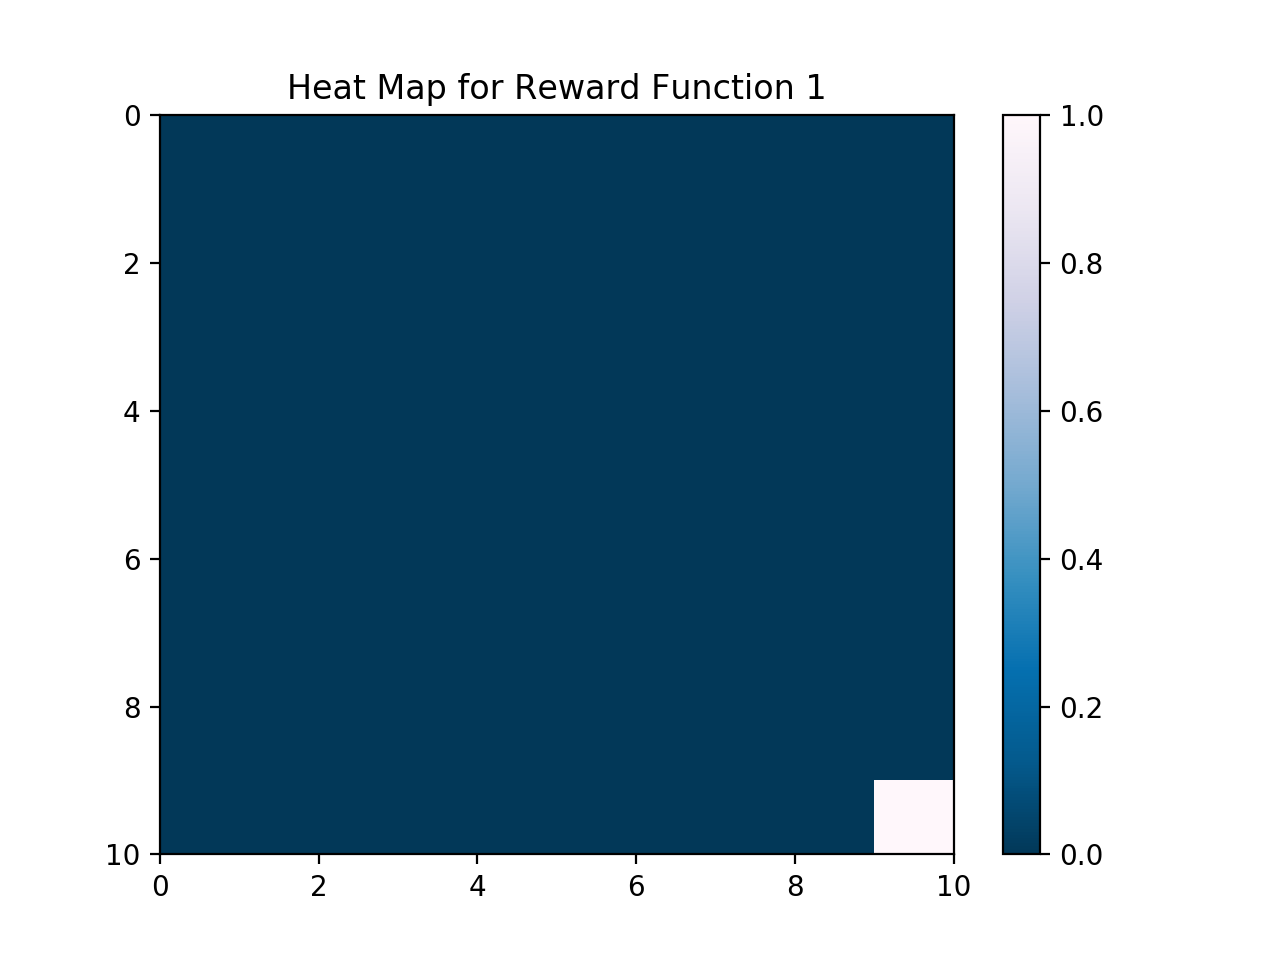

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# #Q1. Generate Heat Map for Figure 6 and Figure 7
reward1 = [[0 for _ in range(10)] for _ in range(10)]
reward1[9][9] = 1
plt.pcolor(reward1, cmap = "PuBu_r")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 1")
plt.show()



<IPython.core.display.Javascript object>


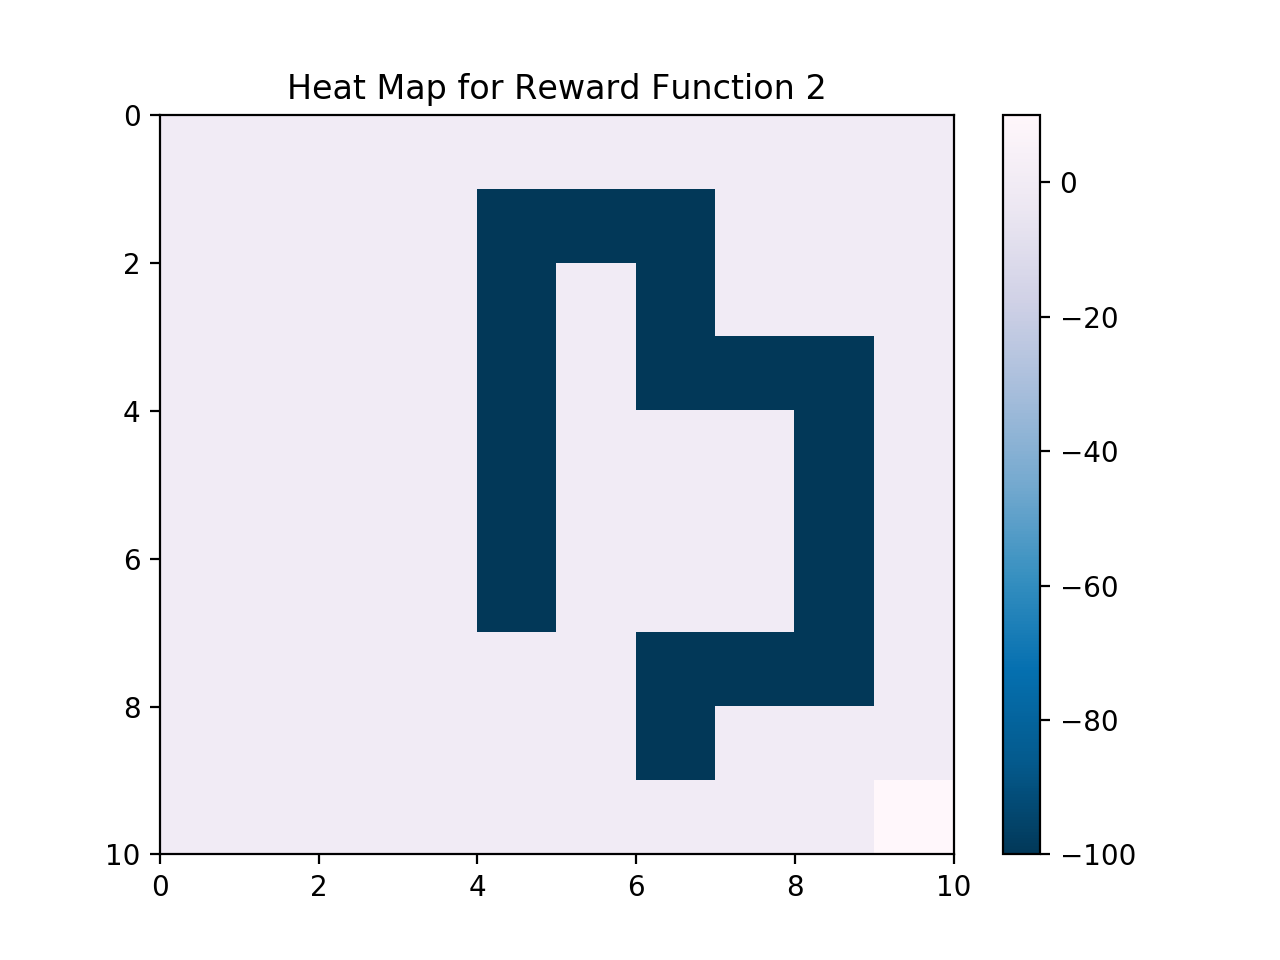

In [11]:
reward2 = [[0 for _ in range(10)] for _ in range(10)]
reward2[1][4:7] = [-100 for _ in range(3)]
reward2[2][4] = -100
reward2[2][6] = -100
reward2[3][4] = -100
reward2[3][6:9] = [-100 for _ in range(3)]
reward2[4][4] = -100
reward2[4][8] = -100
reward2[5][4] = -100
reward2[5][8] = -100
reward2[6][4] = -100
reward2[6][8] = -100
reward2[7][6:9] = [-100 for _ in range(3)]
reward2[8][6] = -100
reward2[9][9] = 10
plt.pcolor(reward2, cmap = "PuBu_r")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 2")
plt.show()

<IPython.core.display.Javascript object>


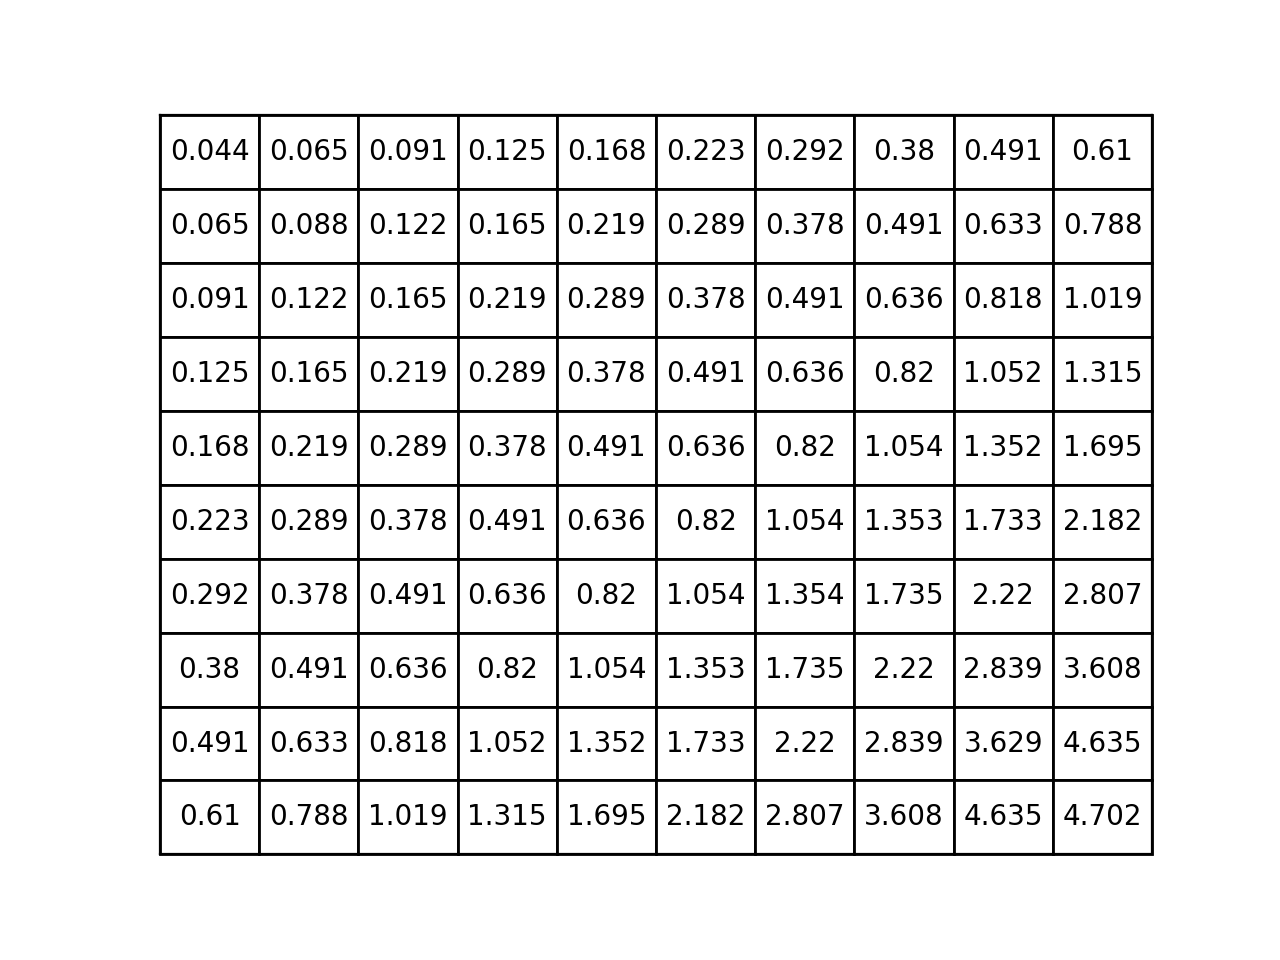

[]

In [13]:
# Q2.
# Create Environment of the Agent
values = [0 for _ in range(100)]
thres = 0.01
actions = [-10, -1, 10, 1] # left, up, right, down
w = 0.1
gamma = 0.8
reward = []
reward1 = np.array(reward1).transpose()
for lines in reward1:
    reward += list(lines)

# Define Probability Function P_{SS'}^{a}
def probability(currS, nextS, move, prob):
    left = currS + actions[0]
    up = currS + actions[1]
    right = currS + actions[2]
    down = currS + actions[3]
    if nextS == left:
        if move == 0:
            return 1-prob+prob/4
        else:
            return prob/4
    elif nextS == up:
        if move == 1:
            return 1-prob+prob/4
        else:
            return prob/4
    elif nextS == right:
        if move == 2:
            return 1-prob+prob/4
        else:
            return prob/4
    elif nextS == down:
        if move == 3:
            return 1-prob+prob/4
        else:
            return prob/4
    elif nextS == currS:
        record = 0
        if left < 0:
            if move == 0:
                record += (1-prob+prob/4)
            else:
                record += prob/4
        if right > 99:
            if move == 2:
                record += (1-prob+prob/4)
            else:
                record += prob/4
        if up % 10 == 9:
            if move == 1:
                record += (1-prob+prob/4)
            else:
                record += prob/4
        if down % 10 == 0:
            if move == 3:
                record += (1-prob+prob/4)
            else:
                record += prob/4
        return record
    else:
        return 0



# Procedure Value Iteration
def compute(currS, move, prob, gamma, reward, values):
    left = currS + actions[0]
    right = currS + actions[2]
    up = currS + actions[1]
    down = currS + actions[3]
    neighbours = [left, right, up, down, currS]
    result = 0
    for neigh in neighbours:
        if neigh < 0 or neigh > 99 or (currS % 10 == 0 and neigh % 10 == 9) or (currS % 10 == 9 and neigh % 10 == 0):
            continue
        result += probability(currS, neigh, move, prob) * (reward[neigh] + gamma * values[neigh])
    return result


def optimal_state_val(values, w, gamma, reward, threshold):
    # 1) Initialization
    for state in range(100):
        values[state] = 0
    # 2) Estimation
    delta = float('inf')
    while delta > threshold:
        delta = 0
        temp = values[:]
        for state in range(100):
            v = values[state]
            values[state] = max(compute(state, 0, w, gamma, reward, temp),
                                compute(state, 1, w, gamma, reward, temp),
                                compute(state, 2, w, gamma, reward, temp),
                                compute(state, 3, w, gamma, reward, temp))
            delta = max(delta, abs(v - values[state]))
    return values

values = optimal_state_val(values, w, gamma, reward, thres)
g1 = np.round(values, decimals=3).reshape(10, 10).transpose()
tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

<IPython.core.display.Javascript object>


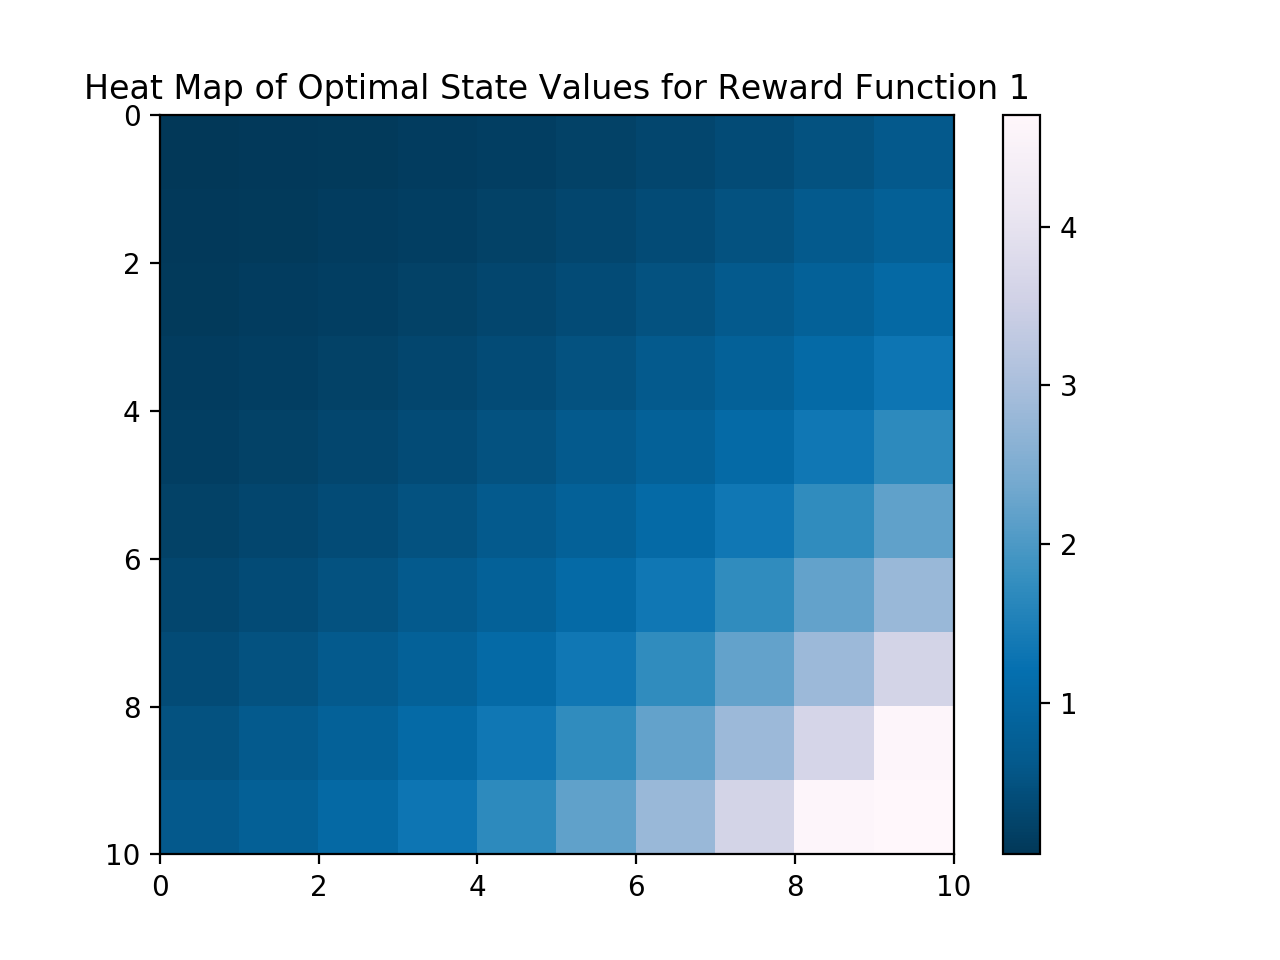

Text(0.5, 1.0, 'Heat Map of Optimal State Values for Reward Function 1')

In [14]:
plt.figure()
plt.pcolor(g1, cmap = "PuBu_r")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Reward Function 1")


<IPython.core.display.Javascript object>


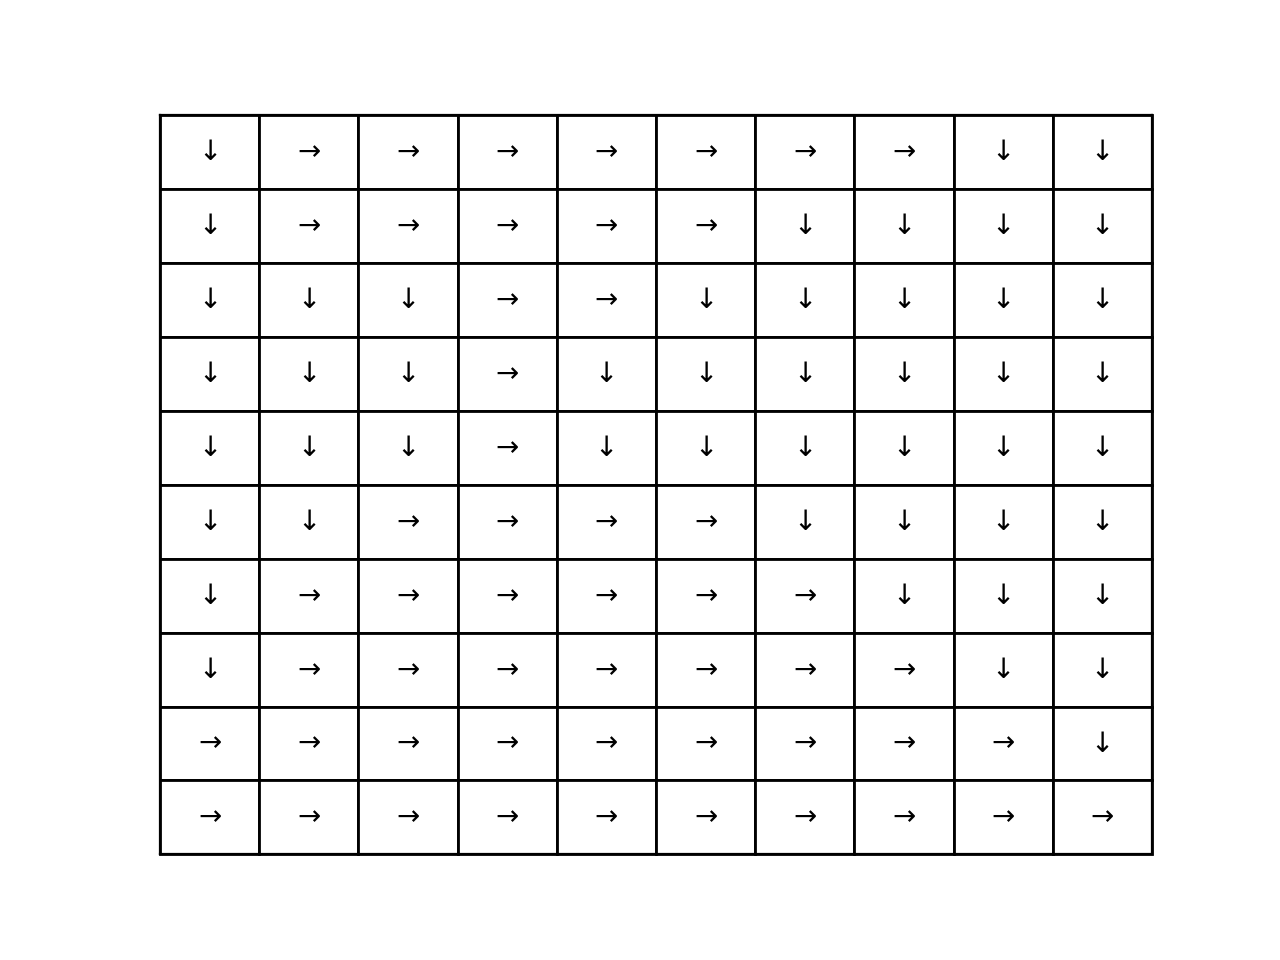

In [15]:
#Q5
pis = [0 for _ in range(100)]
arrows = ['\u2190', '\u2191', '\u2192', '\u2193']
for state in range(100):
    pis[state] = arrows[np.argmax([compute(state, 0, w, gamma, reward, values),
                                   compute(state, 1, w, gamma, reward, values),
                                   compute(state, 2, w, gamma, reward, values),
                                   compute(state, 3, w, gamma, reward, values)])]
pi1 = np.array(pis).reshape(10, 10).transpose()
plt.figure()
tb = plt.table(cellText=pi1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()


<IPython.core.display.Javascript object>


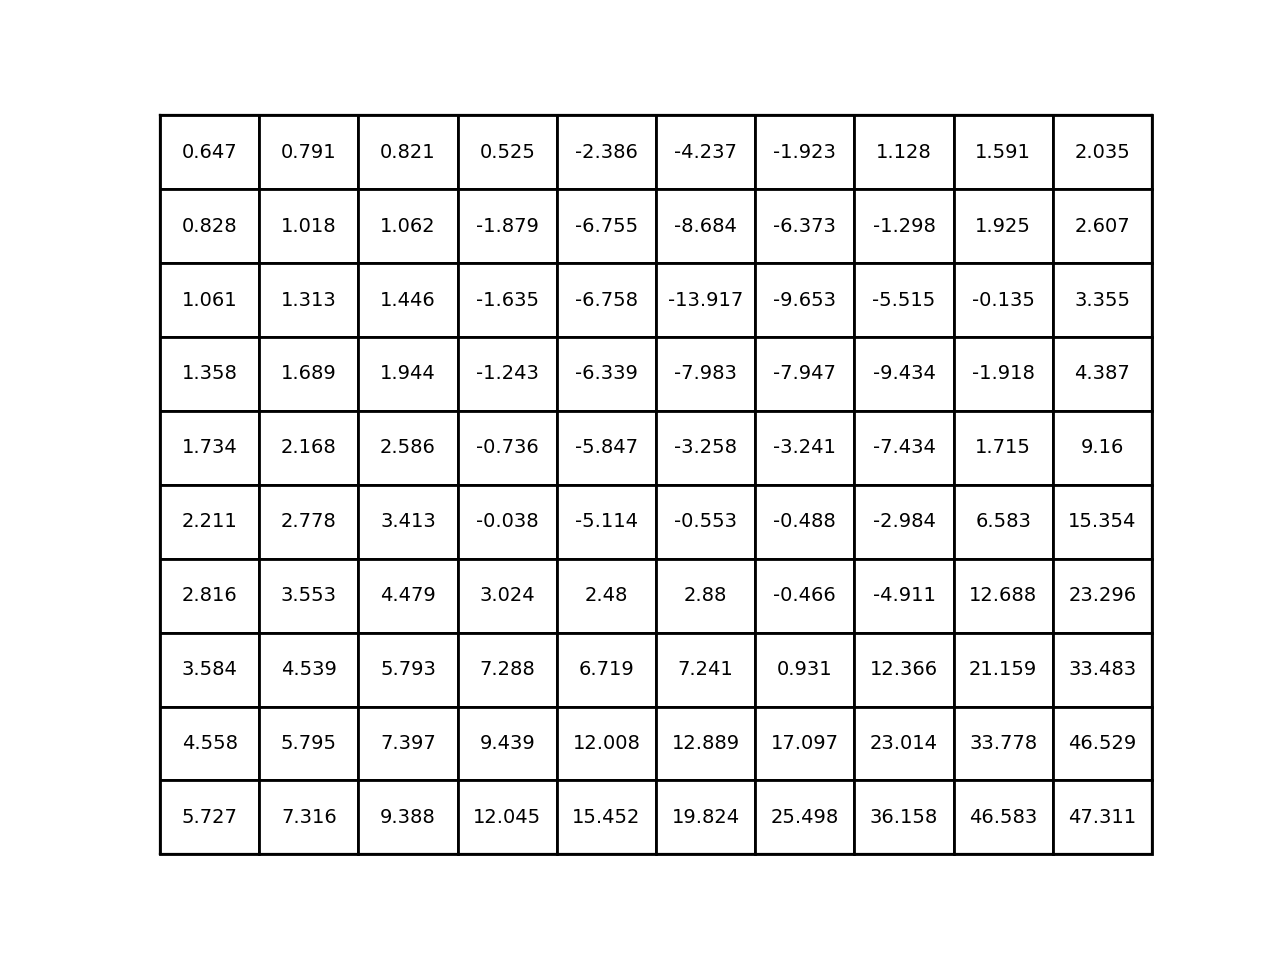

[]

In [16]:
#Q6. With reward function 2
reward = []
reward2 = np.array(reward2).transpose()
for lines in reward2:
    reward += list(lines)

values = optimal_state_val(values, w, gamma, reward, thres)
g1 = np.round(values, decimals=3).reshape(10, 10).transpose()
tb = plt.table(cellText=g1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])


<IPython.core.display.Javascript object>


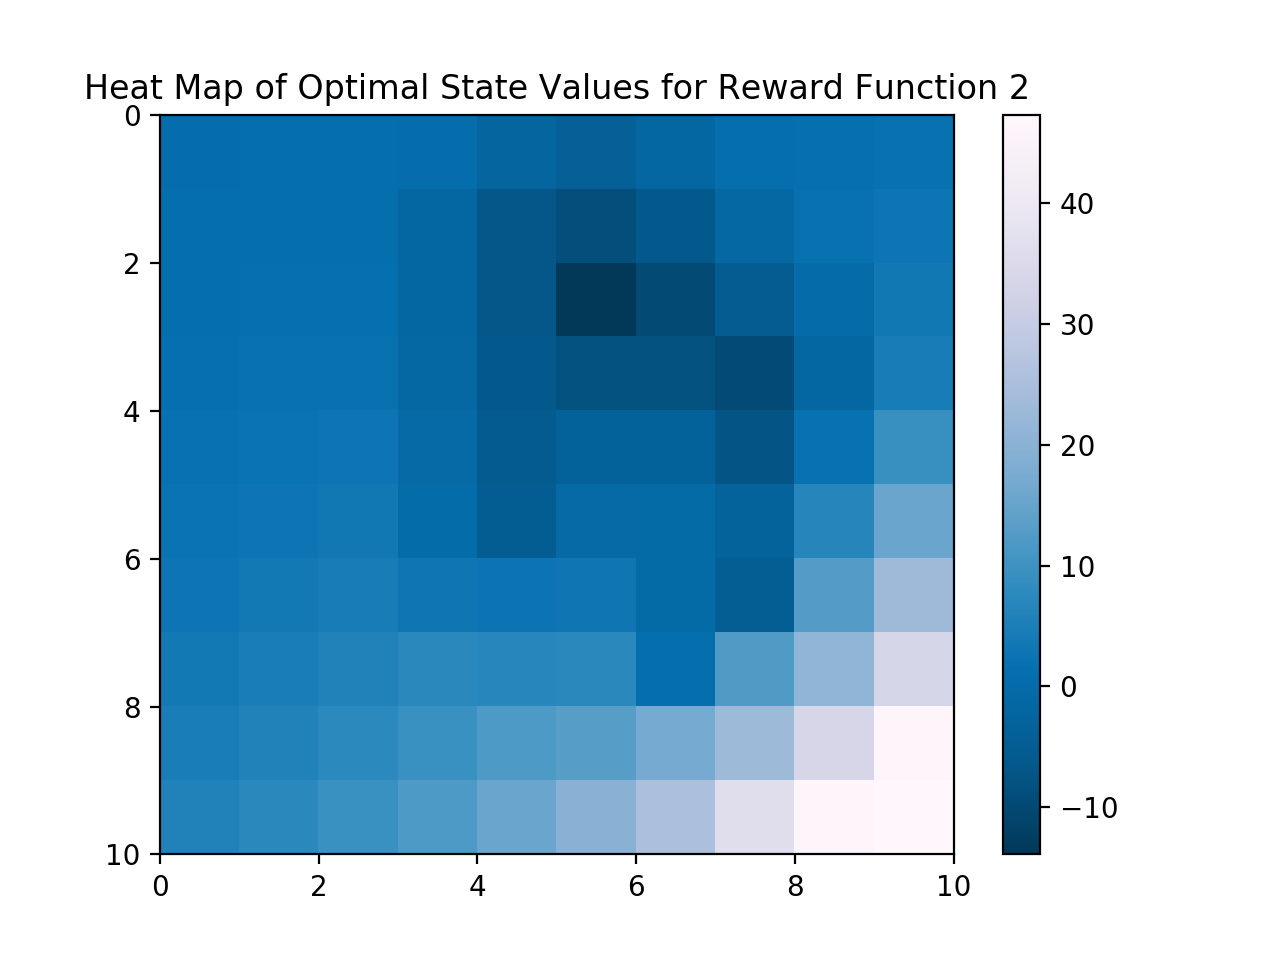

Text(0.5, 1.0, 'Heat Map of Optimal State Values for Reward Function 2')

In [17]:
plt.figure()
plt.pcolor(g1, cmap = "PuBu_r")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Reward Function 2")

<IPython.core.display.Javascript object>


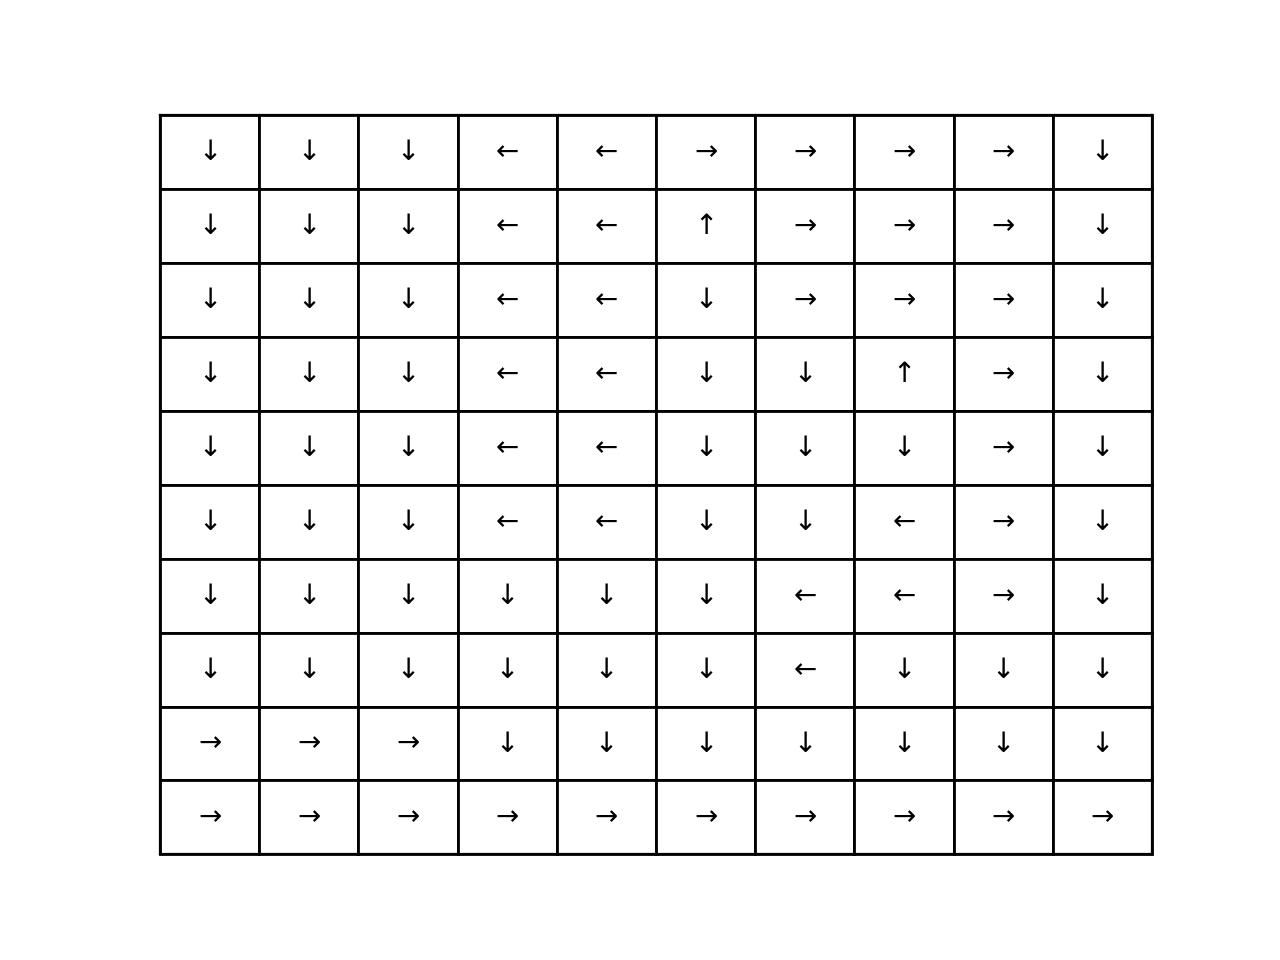

In [18]:
#Q9
pis = [0 for _ in range(100)]
arrows = ['\u2190', '\u2191', '\u2192', '\u2193']
for state in range(100):
    pis[state] = arrows[np.argmax([compute(state, 0, w, gamma, reward, values),
                                   compute(state, 1, w, gamma, reward, values),
                                   compute(state, 2, w, gamma, reward, values),
                                   compute(state, 3, w, gamma, reward, values)])]
pi1 = np.array(pis).reshape(10, 10).transpose()
plt.figure()
tb = plt.table(cellText=pi1, loc=(0,0), cellLoc='center')
tc = tb.properties()['child_artists']
for cell in tc:
    cell.set_height(0.1)
    cell.set_width(0.1)
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()